In [ ]:
# Cf. https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [41]:
# Librairie pandas (manipulation de données csv, dataframe, etc.)
import pandas as pd
import numpy as np

# Import et lecture du corpus :
corpus = pd.read_csv('./data/corpus_tokmorph_ajout_solo.csv')
corpus.head()


,Unnamed: 0,Song,Album Debut,Songwriter(s),Lead Vocal(s),Year,Lyrics,words,lemma,pos,3grams_pos
0,0,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,Words,['word'],['NOUN'],"(['NOUN'], ['AUX'], ['VERB'])"
1,1,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,are,['be'],['AUX'],"(['AUX'], ['VERB'], ['ADP'])"
2,2,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,flowing,['flow'],['VERB'],"(['VERB'], ['ADP'], ['SCONJ'])"
3,3,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,out,['out'],['ADP'],"(['ADP'], ['SCONJ'], ['ADJ'])"
4,4,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,like,['like'],['SCONJ'],"(['SCONJ'], ['ADJ'], ['NOUN'])"


In [42]:
corpus = corpus.drop('Unnamed: 0', 1)
#corpus = corpus.drop('Unnamed: 0.1', 1)
corpus

,Song,Album Debut,Songwriter(s),Lead Vocal(s),Year,Lyrics,words,lemma,pos,3grams_pos
0,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,Words,['word'],['NOUN'],"(['NOUN'], ['AUX'], ['VERB'])"
1,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,are,['be'],['AUX'],"(['AUX'], ['VERB'], ['ADP'])"
2,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,flowing,['flow'],['VERB'],"(['VERB'], ['ADP'], ['SCONJ'])"
3,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,out,['out'],['ADP'],"(['ADP'], ['SCONJ'], ['ADJ'])"
4,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,like,['like'],['SCONJ'],"(['SCONJ'], ['ADJ'], ['NOUN'])"
...,...,...,...,...,...,...,...,...,...,...
48059,Meat City,Mind Games,Lennon,Lennon,1973,Well I been Meat City to see for myself Been M...,mothertruckin,['mothertruckin'],['X'],"(['X'], ['NOUN'], ['NOUN'])"
48060,Meat City,Mind Games,Lennon,Lennon,1973,Well I been Meat City to see for myself Been M...,Meat,['meat'],['NOUN'],"(['NOUN'], ['NOUN'], ['PROPN'])"
48061,Meat City,Mind Games,Lennon,Lennon,1973,Well I been Meat City to see for myself Been M...,City,['city'],['NOUN'],"(['NOUN'], ['PROPN'], ['PROPN'])"
48062,Meat City,Mind Games,Lennon,Lennon,1973,Well I been Meat City to see for myself Been M...,shookdown,['shookdown'],['PROPN'],"(['PROPN'], ['PROPN'], ['SPACE'])"


In [44]:
# Sélection des colonnes pour le count : 

count = corpus[['Song', 'words']]
count

# Cross tab fonction pour compter les valeurs de chaque Songwriter
# on veut que notre index correspondent à notre corpus (LEN, MCC, LMC) et les colonnes à nos mots 
# Cf. https://stackoverflow.com/questions/32589829/how-to-get-value-counts-for-multiple-columns-at-once-in-pandas-dataframe/47187144#47187144

count = pd.crosstab(index=count['Song'], columns=count['words'])
count
# Ajout de la colonne Songwriter(s) :


# /!\ We need to take the same length dataframe so that there are no NANS!!!! 

# Téléchargement du corpus initial pour récupération de la variable Songwriters 
corpus_clean = pd.read_csv('./Corpus/Extension Harrison/corpus_nettoye_extension_harrison.csv')

    # Reset de l'index pour éviter l'introduction de NaN

corpus_clean.reset_index(drop=False, inplace=True)
count.reset_index(drop=False, inplace=True)

# Concaténation de la colonne Songwriters : 

count = pd.concat([count, corpus_clean['Songwriter(s)']], axis=1)


count = count.set_index(['Songwriter(s)', 'Song'])


,Song,,!,"""",','Cause,'cause,'d,'em,'ll,...,you,young,younger,youngsters,your,yours,yourself,zapped,zoo,Songwriter(s)
0,"""A Day in the Life""",0,0,0,0,0,0,3,0,0,...,2,0,0,0,0,0,0,0,0,Lennon
1,"""A Hard Day's Night""",0,1,0,0,0,2,0,0,2,...,12,0,0,0,0,0,0,0,0,Lennon
2,"""Across the Universe""",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,McCartney
3,"""All I've Got to Do""",24,0,0,0,0,0,0,0,5,...,14,0,0,0,1,0,0,0,0,Lennon-McCartney
4,"""All My Loving""",0,0,0,0,0,0,0,0,15,...,10,0,0,0,2,0,0,0,0,Lennon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,Too Many People,7,1,0,0,0,0,0,1,0,...,5,0,0,0,5,0,0,0,0,Lennon
228,Uncle Albert / Admiral Halsey,10,1,6,0,0,0,0,0,1,...,1,0,0,0,2,0,0,0,0,Lennon
229,We're All Water,10,4,0,0,0,0,0,0,2,...,3,0,0,0,0,0,0,0,0,Lennon
230,Woman Is The Nigger Of The World,2,0,0,0,0,0,0,0,0,...,8,1,0,0,0,0,0,0,0,Lennon


In [15]:
#count

In [10]:
# À lancer la première fois pour téléchargement...

# %pip install sklearn-pandas

Here we need to perform a few normalisations, such as z-scores each variable, and operating a vector-length normalisation (to euclidean length 1) for texts (cf. Evert et al., 2017, doi:10.1093/llc/fqx023).

**DÉBUT PARCOURS MODIFIÉ (JBC)**


In [46]:
# Calcul des z-scores :

# Pour chacun des n traits et des x sous-corpus d’auteurs, calculer un Zscore 
# qui décrit l’écart entre la présence de ce trait dans ce sous-corpus et la norme du corpus. 
# Pour ce faire, il faut soustraire la “moyenne de moyennes” du corpus pour le trait de 
# la présence de ce trait observée dans le sous-corpus, puis diviser le résultat par 
# l’écart-type du trait. La figure 7 présente la formule de calcul de la cote Z pour 
# le trait ‘i’, où C(i) représente la fréquence observée, la lettre grecque mu 
# représente la moyenne des moyennes, et la lettre grecque sigma représente l’écart-type.
# Cf. https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num

import sklearn.preprocessing as preproc
import sklearn.pipeline

# Fonctions pour garder le format df :

#z-scores
scaler = preproc.StandardScaler().fit(count)
scaled_features = scaler.transform(count)
#vector-length normalisation, aka L2 Norm
transformer = preproc.Normalizer().fit(scaled_features)
scaled_features = transformer.transform(scaled_features)

#mapper = DataFrameMapper([(count.columns, StandardScaler())])
#scaled_features = mapper.fit_transform(count.copy(), 2576) # nb colonnes
scaled_features_count = pd.DataFrame(scaled_features, index=count.index, columns=count.columns)

# fit_transform(X[, y]) ==> Fit to data, then transform it.
# inverse_transform(X[, copy]) ==> Scale back the data to the original representation


In [47]:
scaled_features_count

!  \
Songwriter(s)    Song                                                   
Lennon           "A Day in the Life"              -0.004772 -0.002996   
                 "A Hard Day's Night"             -0.010296  0.007817   
McCartney        "Across the Universe"            -0.004758 -0.002987   
Lennon-McCartney "All I've Got to Do"              0.133448 -0.007169   
Lennon           "All My Loving"                  -0.009799 -0.006151   
...                                                     ...       ...   
                 Too Many People                   0.017574  0.004943   
                 Uncle Albert / Admiral Halsey     0.024156  0.004280   
                 We're All Water                   0.020879  0.023974   
                 Woman Is The Nigger Of The World  0.000367 -0.004050   
                 You Are Here                      0.007326 -0.004128   

                                                          "         '  \
Songwriter(s)    Song                                                   
Lennon           "A Day in the Life"              -0.002690 -0.002252   
                 "A Hard Day's Night"             -0.005803 -0.004858   
McCartney        "Across the Universe"            -0.002682 -0.002245   
Lennon-McCartney "All I've Got to Do"             -0.006438 -0.005389   
Lennon           "All My Loving"                  -0.005523 -0.004623   
...                                                     ...       ...   
                 Too Many People                  -0.003669 -0.003072   
                 Uncle Albert / Admiral Halsey     0.037776 -0.002660   
                 We're All Water                  -0.002746 -0.002299   
                 Woman Is The Nigger Of The World -0.003636 -0.003044   
                 You Are Here                     -0.003707 -0.003103   

                                                     'Cause    'cause  \
Songwriter(s)    Song                                                   
Lennon           "A Day in the Life"              -0.002162 -0.002154   
                 "A Hard Day's Night"             -0.004666  0.149377   
McCartney        "Across the Universe"            -0.002156 -0.002148   
Lennon-McCartney "All I've Got to Do"             -0.005176 -0.005155   
Lennon           "All My Loving"                  -0.004440 -0.004423   
...                                                     ...       ...   
                 Too Many People                  -0.002950 -0.002939   
                 Uncle Albert / Admiral Halsey    -0.002555 -0.002545   
                 We're All Water                  -0.002208 -0.002199   
                 Woman Is The Nigger Of The World -0.002924 -0.002912   
                 You Are Here                     -0.002980 -0.002969   

                                                         'd       'em  \
Songwriter(s)    Song                                                   
Lennon           "A Day in the Life"               0.033646 -0.000742   
                 "A Hard Day's Night"             -0.007478 -0.001601   
McCartney        "Across the Universe"            -0.003456 -0.000740   
Lennon-McCartney "All I've Got to Do"             -0.008295 -0.001776   
Lennon           "All My Loving"                  -0.007117 -0.001524   
...                                                     ...       ...   
                 Too Many People                  -0.004728  0.233823   
                 Uncle Albert / Admiral Halsey    -0.004094 -0.000876   
                 We're All Water                  -0.003539 -0.000758   
                 Woman Is The Nigger Of The World -0.004686 -0.001003   
                 You Are Here                     -0.004777 -0.001023   

                                                        'll        'm  ...  \
Songwriter(s)    Song                                                  ...   
Lennon           "A Day in the Life"              -0.005282 -0.004491  ...   
                 "A Hard Day's Nig

In [48]:
scaled_features_countb = scaled_features_count.reset_index(level=0, drop=True)

In [49]:
scaled_features_countb

,,!,"""",','Cause,'cause,'d,'em,'ll,'m,...,yin,you,young,younger,youngsters,your,yours,yourself,zapped,zoo
Song,,,,,,,,,,,,,,,,,,,,,
"""A Day in the Life""",-0.004772,-0.002996,-0.002690,-0.002252,-0.002162,-0.002154,0.033646,-0.000742,-0.005282,-0.004491,...,-0.000742,-0.007992,-0.001748,-0.000742,-0.000742,-0.005421,-0.000742,-0.001698,-0.000742,-0.000742
"""A Hard Day's Night""",-0.010296,0.007817,-0.005803,-0.004858,-0.004666,0.149377,-0.007478,-0.001601,0.012104,0.014878,...,-0.001601,0.015414,-0.003772,-0.001601,-0.001601,-0.011695,-0.001601,-0.003663,-0.001601,-0.001601
"""Across the Universe""",-0.004758,-0.002987,-0.002682,-0.002245,-0.002156,-0.002148,-0.003456,-0.000740,-0.005266,-0.004478,...,-0.000740,-0.010987,-0.001743,-0.000740,-0.000740,-0.005405,-0.000740,-0.001693,-0.000740,-0.000740
"""All I've Got to Do""",0.133448,-0.007169,-0.006438,-0.005389,-0.005176,-0.005155,-0.008295,-0.001776,0.052530,-0.010749,...,-0.001776,0.024344,-0.004184,-0.001776,-0.001776,-0.002805,-0.001776,-0.004064,-0.001776,-0.001776
"""All My Loving""",-0.009799,-0.006151,-0.005523,-0.004623,-0.004440,-0.004423,-0.007117,-0.001524,0.156893,0.014160,...,-0.001524,0.008454,-0.003590,-0.001524,-0.001524,0.006318,-0.001524,-0.003486,-0.001524,-0.001524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Too Many People,0.017574,0.004943,-0.003669,-0.003072,-0.002950,-0.002939,-0.004728,0.233823,-0.007205,-0.006127,...,-0.001012,-0.004709,-0.002385,-0.001012,-0.001012,0.021586,-0.001012,-0.002316,-0.001012,-0.001012
Uncle Albert / Admiral Halsey,0.024156,0.004280,0.037776,-0.002660,-0.002555,-0.002545,-0.004094,-0.000876,0.000194,-0.001942,...,-0.000876,-0.011230,-0.002065,-0.000876,-0.000876,0.003635,-0.000876,-0.002006,-0.000876,-0.000876
We're All Water,0.020879,0.023974,-0.002746,-0.002299,-0.002208,-0.002199,-0.003539,-0.000758,0.005728,-0.004586,...,-0.000758,-0.006615,-0.001785,-0.000758,-0.000758,-0.005535,-0.000758,-0.001734,-0.000758,-0.000758


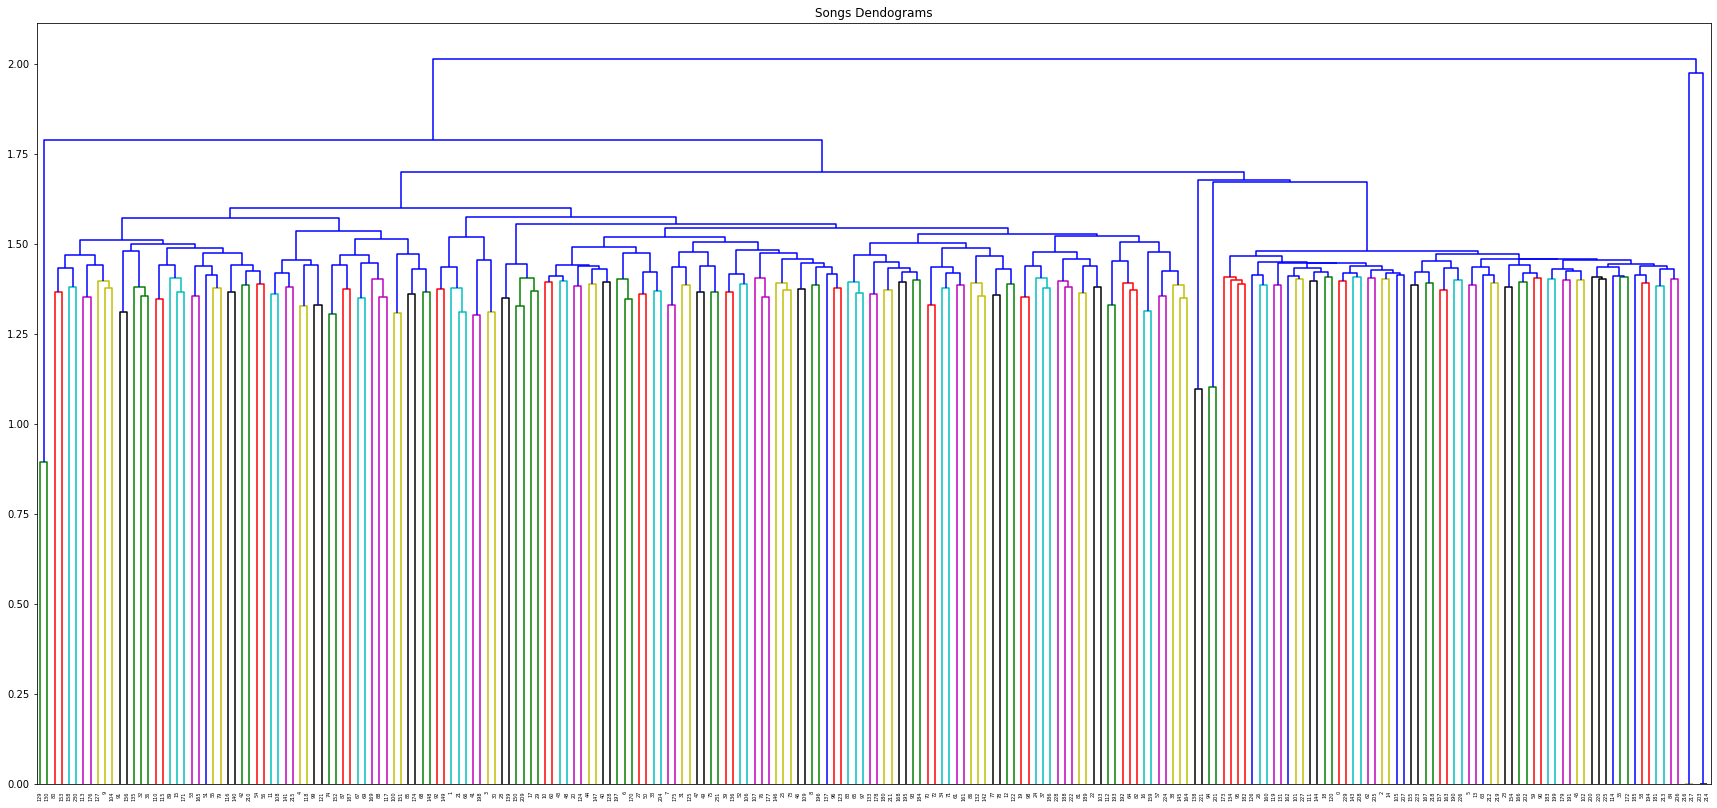

In [50]:
# CAH

import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 14))
plt.title("Songs Dendograms")
Z = shc.linkage(scaled_features_countb, method='ward')
dend = shc.dendrogram(Z)

Ok, that's nice, but can't we get a better looking plot, with labels, appropriate coulours, etc. ?

In [51]:
#Verify that labelling is correct
#list(scaled_features_count.index)
#dend["leaves"]
list(scaled_features_count.index)

[('Lennon', '"A Day in the Life"'),
 ('Lennon', '"A Hard Day\'s Night"'),
 ('McCartney', '"Across the Universe"'),
 ('Lennon-McCartney', '"All I\'ve Got to Do"'),
 ('Lennon', '"All My Loving"'),
 ('Lennon-McCartney', '"All Together Now"'),
 ('Lennon-McCartney', '"All You Need Is Love"'),
 ('McCartney', '"And I Love Her"'),
 ('Lennon-McCartney', '"And Your Bird Can Sing"'),
 ('Lennon-McCartney', '"Another Girl"'),
 ('Lennon-McCartney', '"Any Time at All"'),
 ('Lennon-McCartney', '"Ask Me Why"'),
 ('McCartney', '"Baby\'s in Black"'),
 ('Lennon', '"Baby, You\'re a Rich Man"'),
 ('Lennon', '"Back in the U.S.S.R.'),
 ('Lennon', '"Bad to Me"'),
 ('Lennon-McCartney', '"Because I Know You Love Me So"'),
 ('Lennon-McCartney', '"Because"'),
 ('Lennon-McCartney', '"Being for the Benefit of Mr. Kite!"'),
 ('McCartney', '"Birthday"'),
 ('McCartney', '"Blackbird"'),
 ('McCartney', '"Can\'t Buy Me Love"'),
 ('Lennon', '"Carry That Weight"'),
 ('McCartney', '"Child of Nature"'),
 ('Lennon', '"Come Tog

In [53]:
# Create labels
# First, labels
#nodeLabels = [s[0]+"_"+s[1] for s in list(scaled_features_count.index[dend["leaves"]])]
nodeLabels = [str(s[0])+"_"+s[1] for s in list(scaled_features_count.index)]
#nodeLabels = {dend["leaves"][i[0]]: nodeLabels[i[0]] for i in enumerate(nodeLabels)}
#{i: list(scaled_features_count.index)[i][0] for i in dend["leaves"] }
#nodeLabels

In [54]:
# Create colors
# Thanks to Ulrich Stern,
# https://stackoverflow.com/questions/38153829/custom-cluster-colors-of-scipy-dendrogram-in-python-link-color-func
cols = {i[0]: i[1][0] for i in enumerate(list(scaled_features_count.index))}
for col in cols:
    #print(cols.get(col))
    if cols.get(col) == 'Lennon':
        cols[col] = '#FF0000' #'red'
    elif cols.get(col) == 'McCartney':
        cols[col] =  '#0000FF' #'blue'
    else: 
        cols[col] = '#800080' # purple
    #print(cols[col])

#cols
dflt_col = "#808080"   # Unclustered gray
link_cols = {}
for i, i12 in enumerate(Z[:,:2].astype(int)):
  c1, c2 = (link_cols[x] if x > len(Z) else cols[x]
    for x in i12)
  link_cols[i+1+len(Z)] = c1 if c1 == c2 else dflt_col

#link_cols
# and finally for leaf coloring
label_colors = {i[1]: cols[i[0]] for i in enumerate(nodeLabels)}

In [55]:
#nodeLabels[129]
#cols[129]
#label_colors

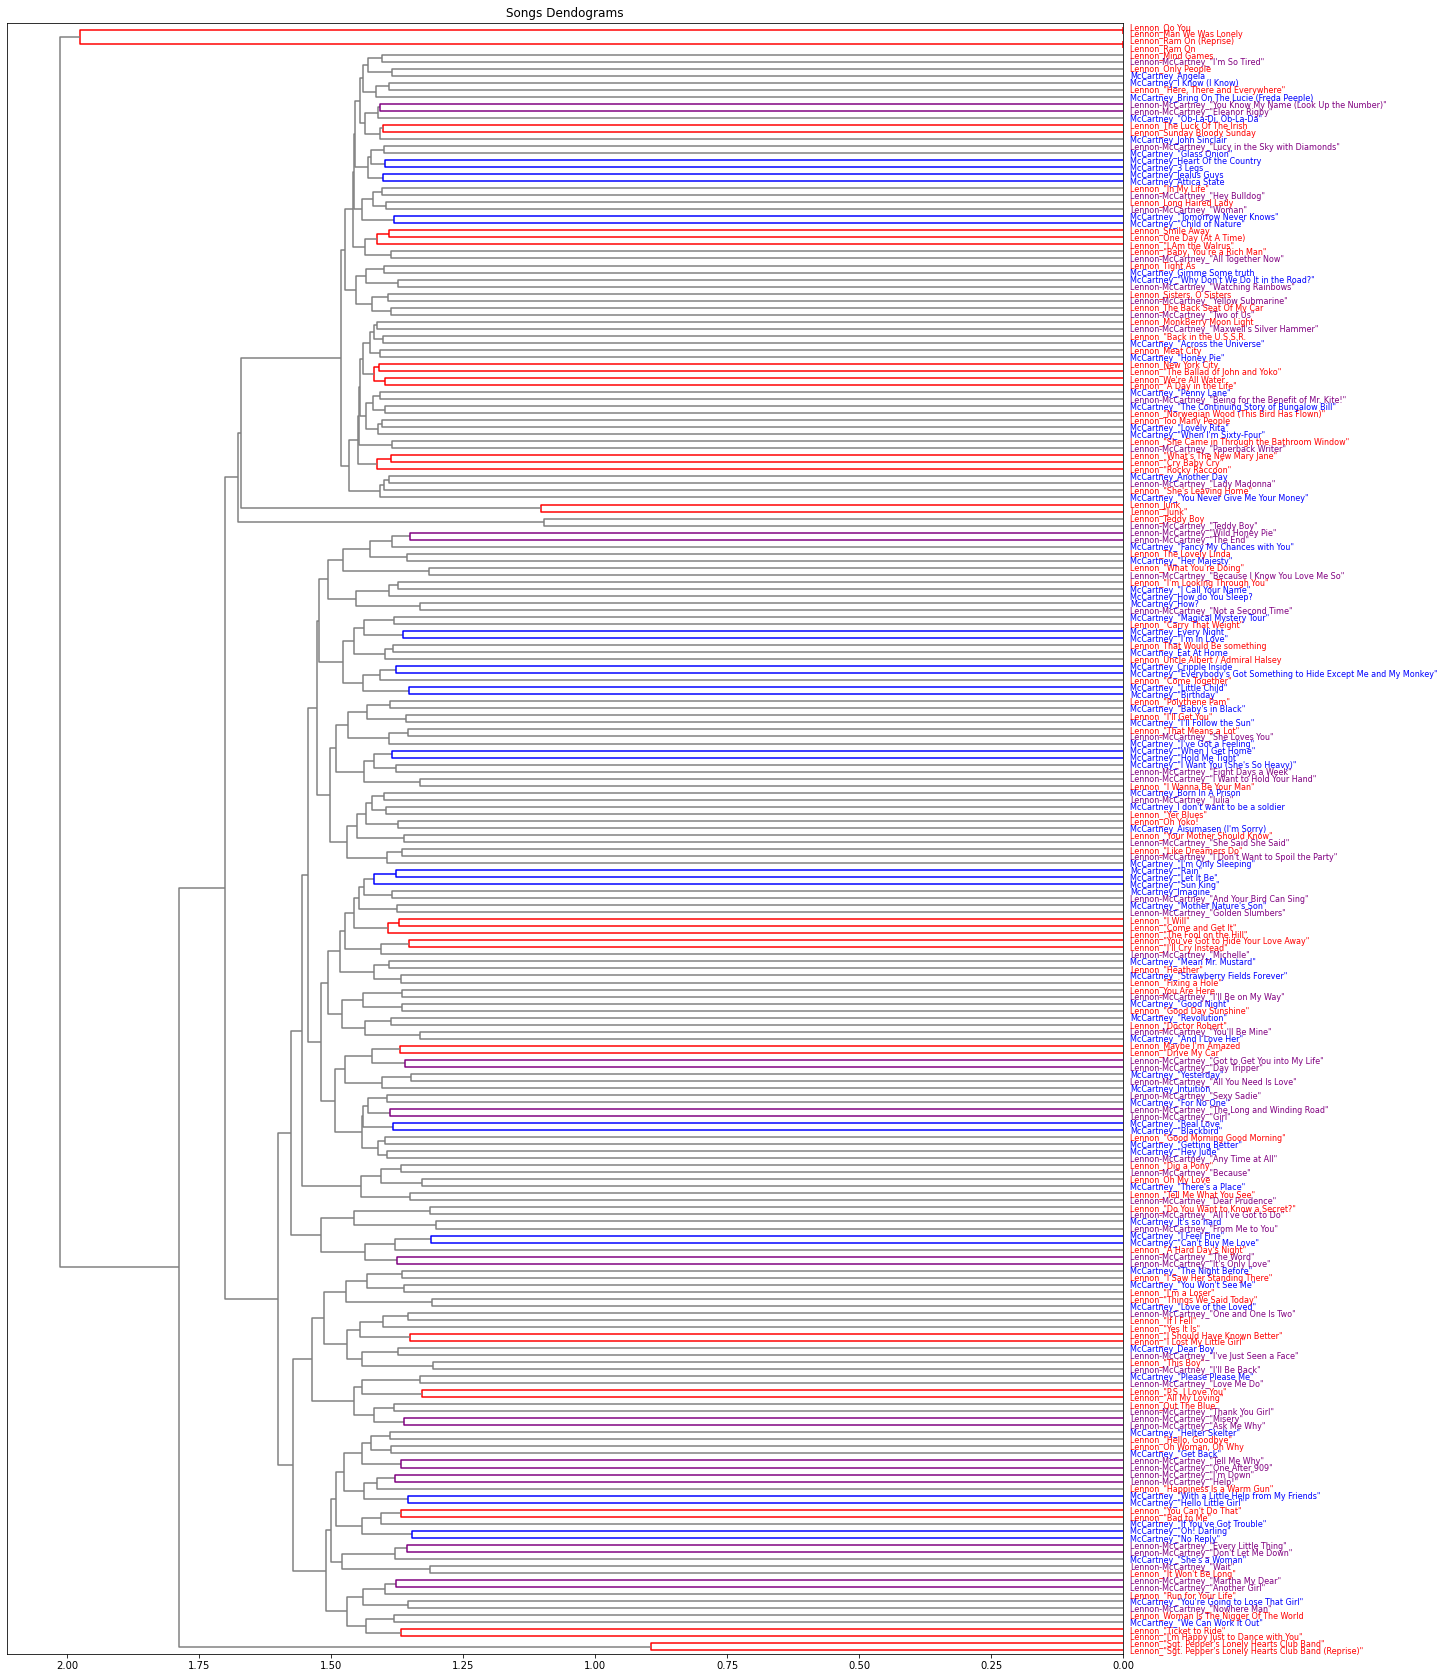

In [56]:
plt.figure(figsize=(20, 30))
#fig = plt.figure(figsize=(20, 30))
plt.title("Songs Dendograms")
#ax = fig.add_subplot(10,10,10)

shc.dendrogram(
            Z,
#            ax=ax,
#            truncate_mode='lastp',  # show only the last p merged clusters
#            p=len(labels),  # show only the last p merged clusters
            leaf_font_size=8, 
            orientation='left',
            color_threshold=None,
            labels = nodeLabels,
            link_color_func=lambda x: link_cols[x]
            )

plt.draw()

ax = plt.gca()
ylbls = ax.get_ymajorticklabels()
for lbl in ylbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

#dend['leaves']
# Branch colors show «pure» clusters

and now onto an heatmap, based on crossing CAH:

/Users/samperochon/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 2880x2880 with 0 Axes>

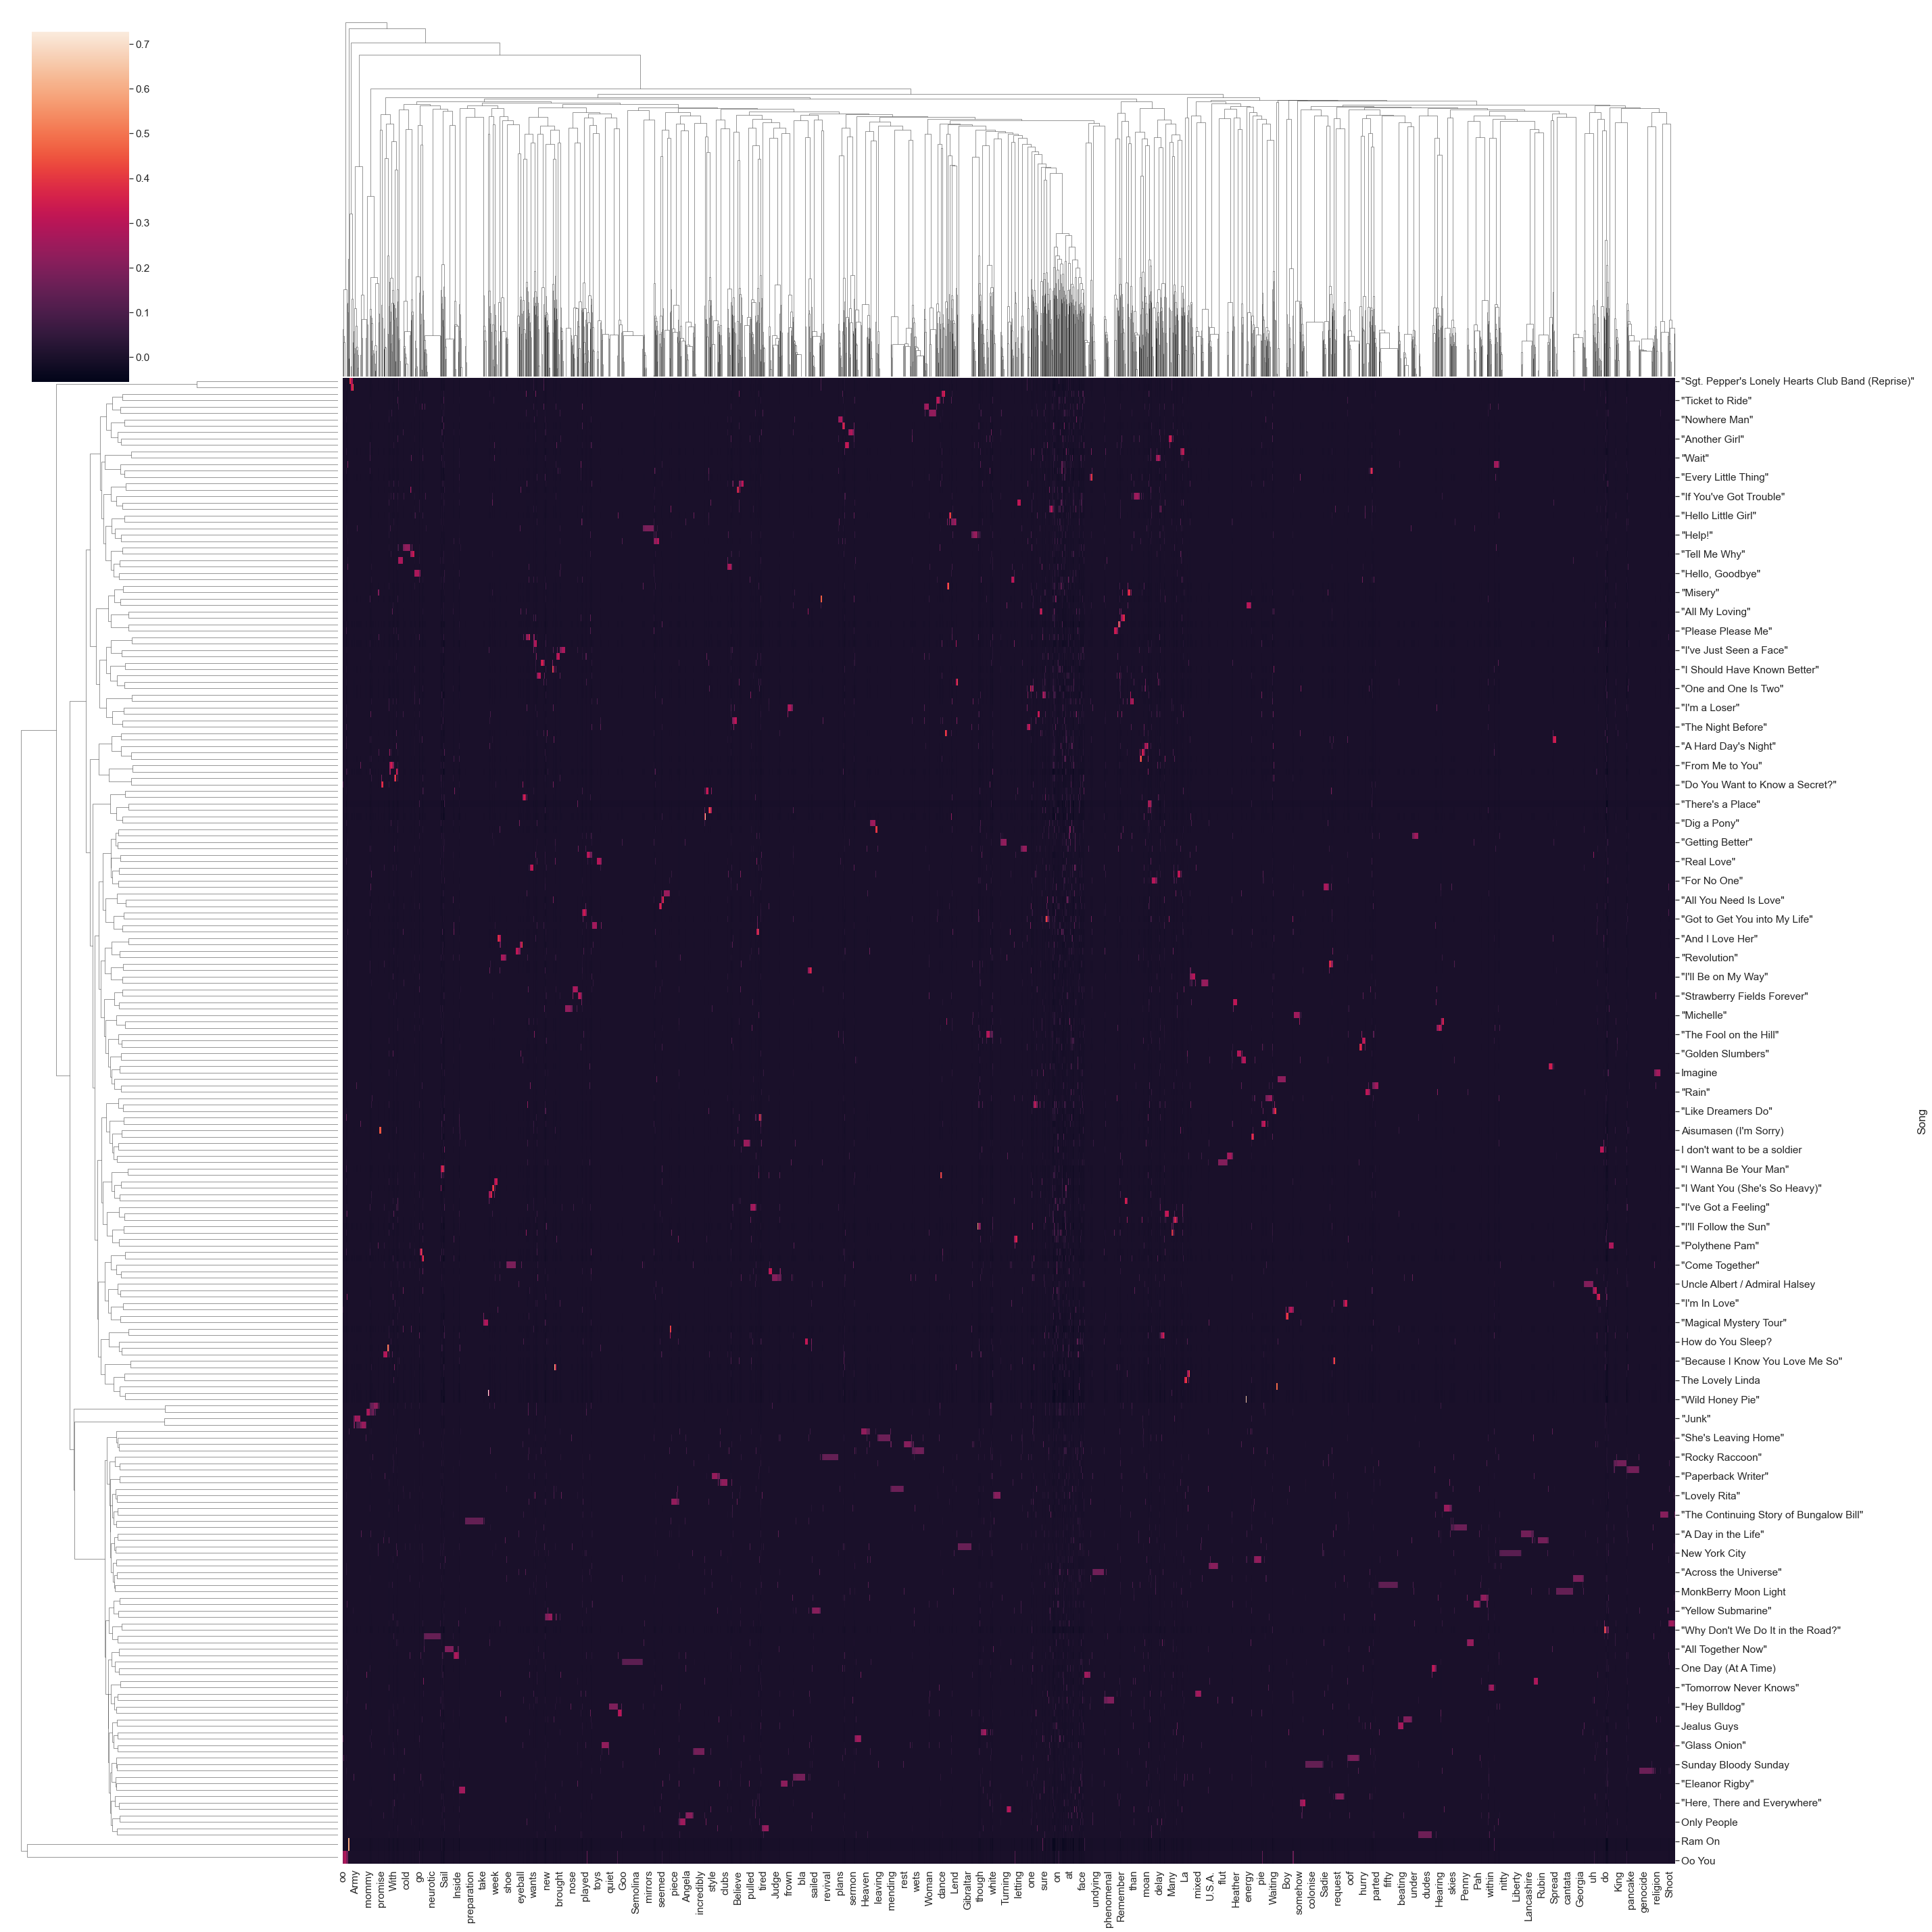

In [59]:
import seaborn as sns

plt.figure(figsize=(40,40))
# Standardize or Normalize every column in the figure
# Standardize:
sns.clustermap(scaled_features_countb,  method="ward", figsize=(40,40)) #does not accept Ward with Manhattan, but should
plt.show()

Not very useful for us. Actually, what we are trying to do is not preexistent in Seaborn, we need more imagination.

In [403]:
#scaled_features_countb.values
#[nodeLabels[i] for i in dend['leaves']]
#dists
#df = scaled_features_countb.reindex([label[1] for label in list(scaled_features_count.index[dend["leaves"]])])
#df
#dists
#[label for label in list(scaled_features_countb.index[dend["leaves"]])]

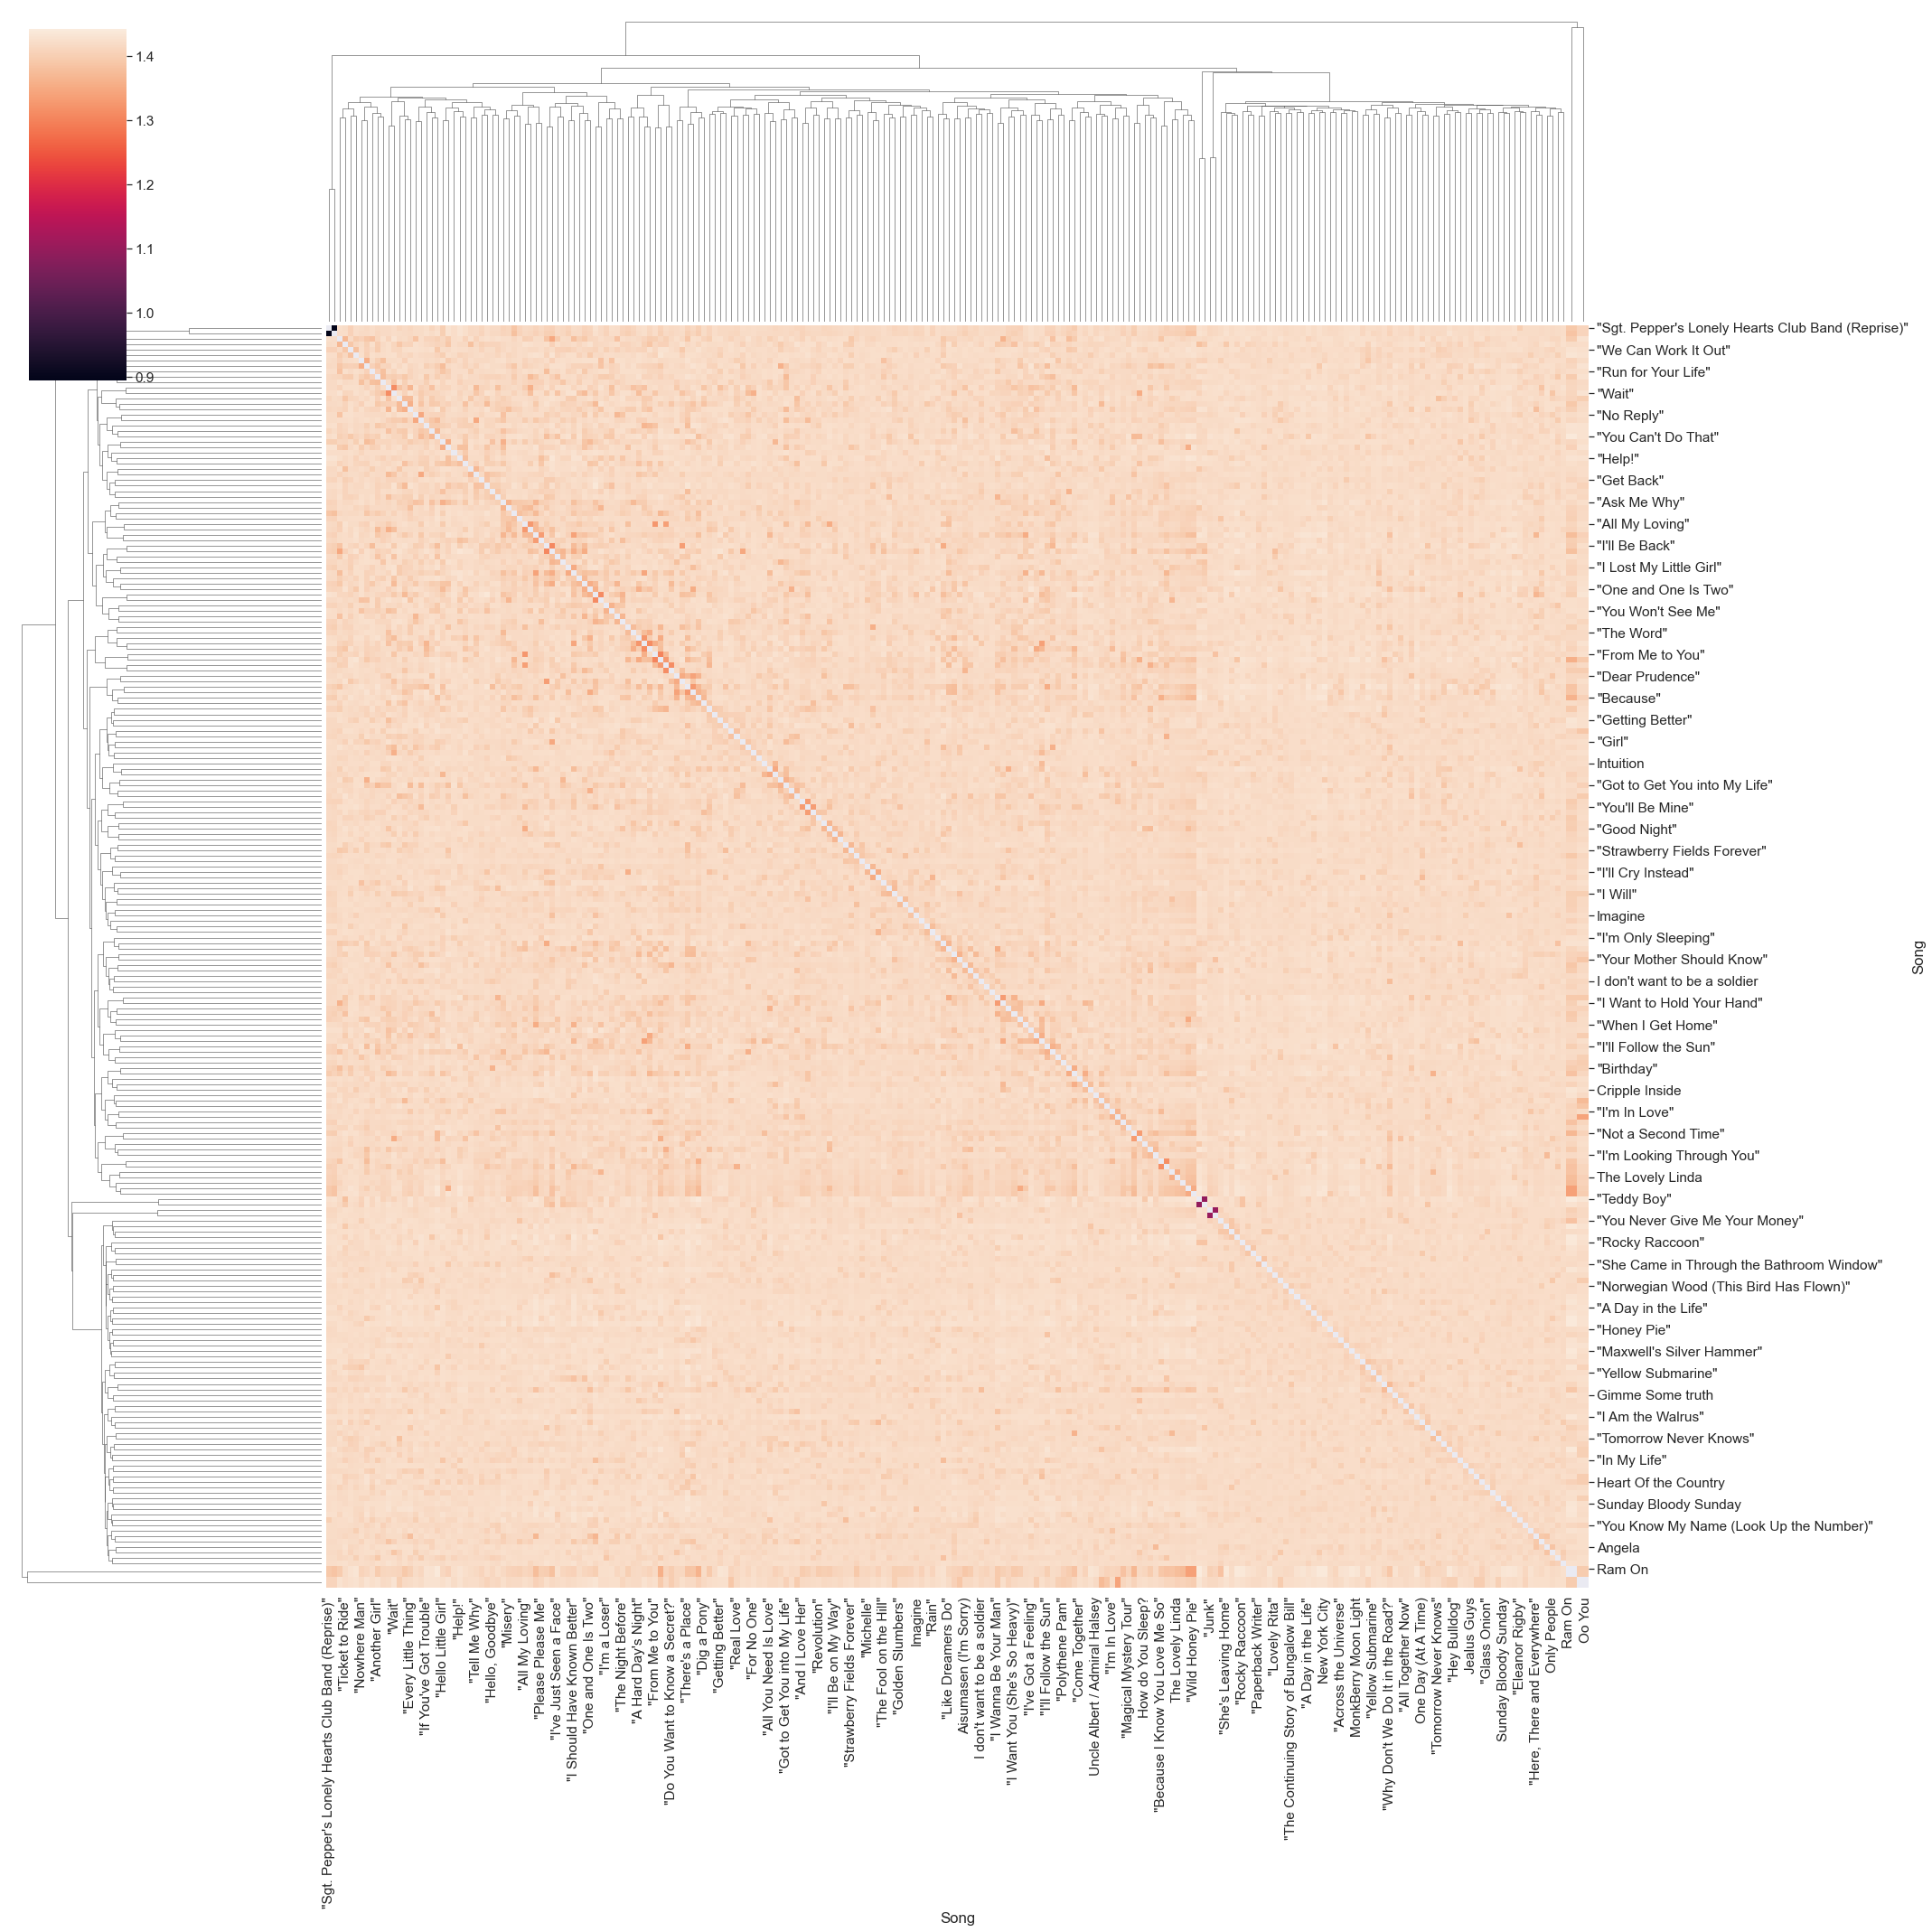

In [58]:
import scipy.spatial
from scipy.cluster.hierarchy import dendrogram, linkage

# get distance matrix
dists = pd.DataFrame(scipy.spatial.distance.cdist(scaled_features_countb.values, scaled_features_countb.values), 
             index=scaled_features_countb.index, columns=scaled_features_countb.index)
# Reorder rows and columns
dists = dists.reindex([label for label in list(scaled_features_countb.index[dend["leaves"]])], columns = [label for label in list(scaled_features_countb.index[dend["leaves"]])])


df = scaled_features_countb.reindex([label for label in list(scaled_features_countb.index[dend["leaves"]])])

Z = linkage(df, 'ward')

# mask 0 values to avoid messing the scales up (cf. edges length on dendrogram…)
mask = dists == 0

sns.set(font_scale=1.4)
sns.clustermap(dists, row_linkage=Z, col_linkage=Z, mask=mask, figsize=(30,30))
#sns.clustermap(dists, method="ward", cmap='RdBu', annot=True, annot_kws={"size": 7}, vmin=-1, vmax=1, figsize=(15,12));


To finish, it is also imaginable to apply dimensionnality reduction techniques, to explore the texts in two dimensions.

[0.13290714 0.0764053 ]


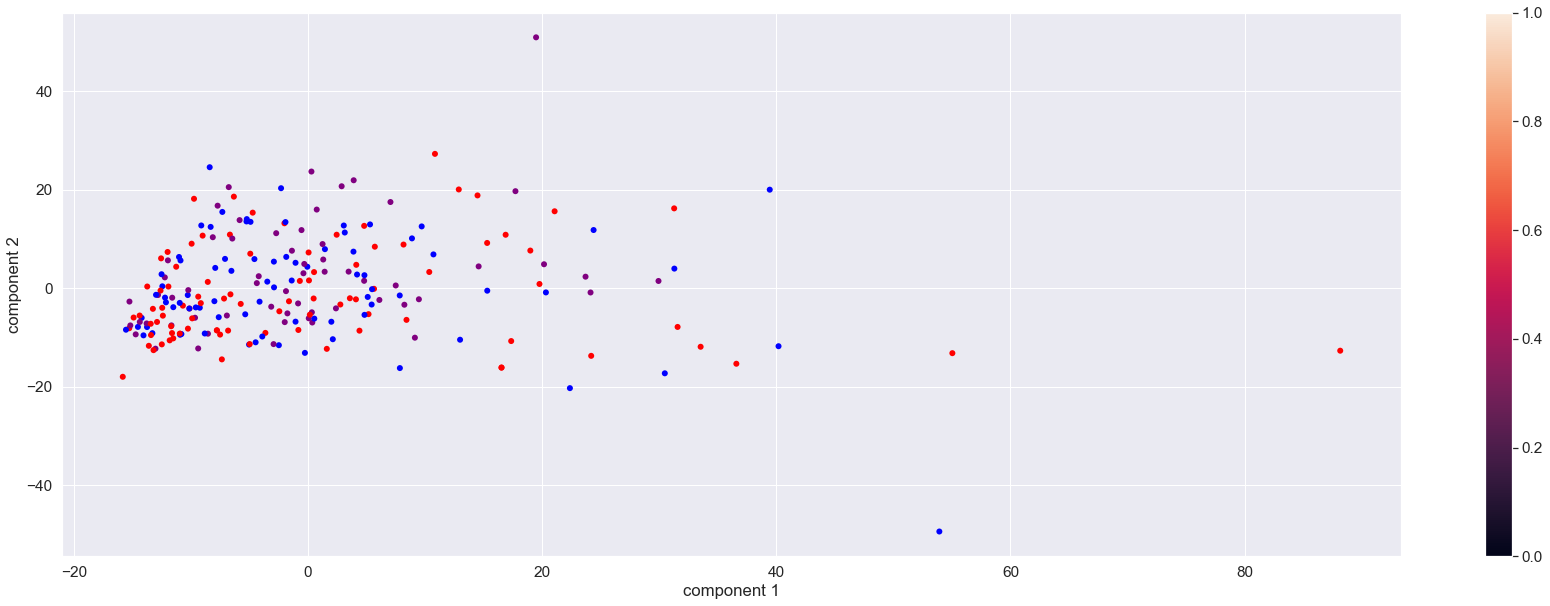

In [61]:
#count
from sklearn.decomposition import PCA, SparsePCA, MiniBatchSparsePCA
pca = PCA(n_components=2)
pca.fit(count)
print(pca.explained_variance_ratio_) # not so great

projected = pca.fit_transform(count)

# again, get some color


plt.figure(figsize=(30,10))

plt.scatter(projected[:, 0], projected[:, 1],
            c=[cols[i] for i in cols], edgecolor='none')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

OUCH, PCA is very subject to outliers. Let's try a supposedly more robust version.

(NB: this one is a bit intensive. MiniBatchSparsePCA provides a more efficient if less exact version)

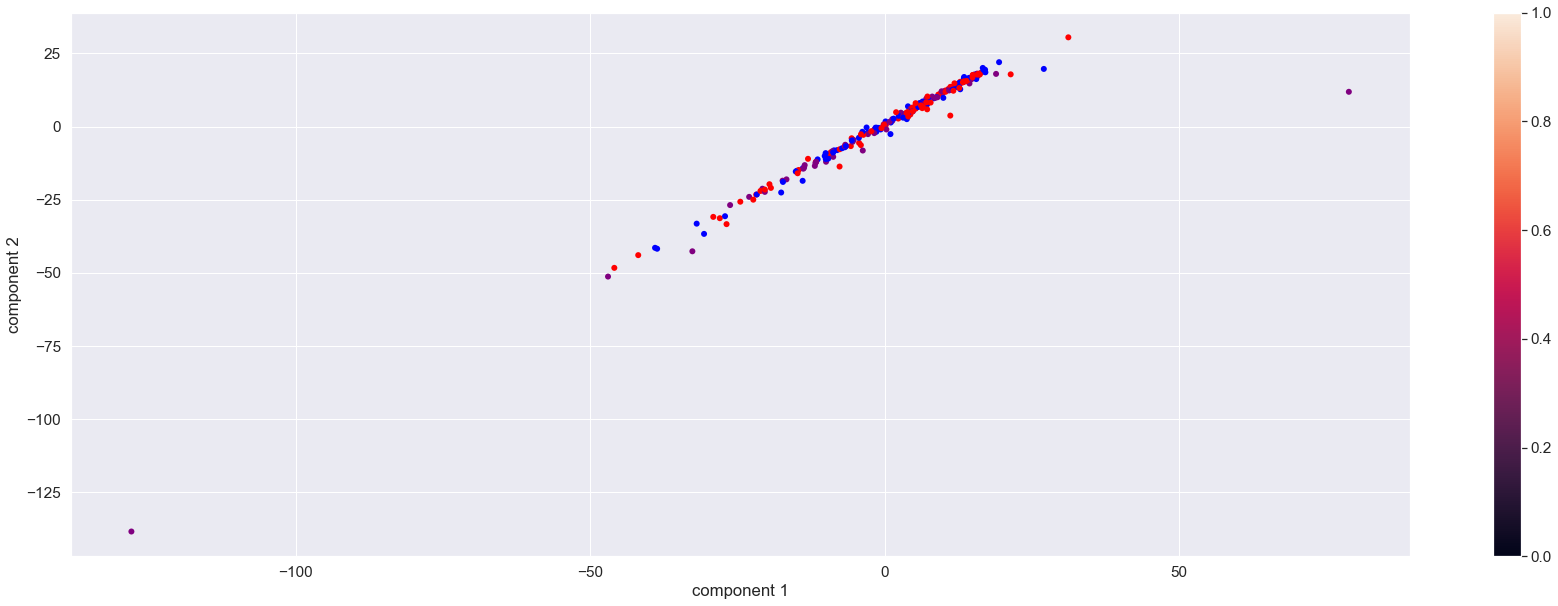

In [62]:
#pca = SparsePCA(n_components=2)
# if the previous is too long use:
pca = MiniBatchSparsePCA(n_components=2)
pca.fit(count)
#print(pca.explained_variance_ratio_) # not so great

projected = pca.fit_transform(count)

plt.figure(figsize=(30,10))

plt.scatter(projected[:, 0], projected[:, 1],
            c=[cols[i] for i in cols], edgecolor='none', )
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

**FIN DU PARCOURS MODIFIÉ**